# Face recognition
The goal is to build a face identification model to recognize faces.

### Dataset
Aligned Face Dataset from Pinterest
This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

### Objective
In this problem, we use a pre-trained model trained on Face recognition to recognize similar faces. Here, we are particularly interested in recognizing whether two given faces are of the same person or not.

In [0]:
%tensorflow_version 2.x

In [3]:
import tensorflow
tensorflow.__version__

'2.2.0-rc3'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [5]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
!ls

'Aligned Face Dataset from Pinterest.zip'
 Face_mask_segmentation_Questions_Project_CV_AIML_Online.ipynb
'Face recognition -Sanket Shetye - Project - CV - AIML Online.ipynb'
 images.npy
 model-0.52.h5
 model-0.56.h5
 model-0.62.h5
 model-0.80.h5
 model-1.34.h5
 PINS
 Untitled0.ipynb
 vgg_face_weights.h5


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:

import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Aligned Face Dataset from Pinterest.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/PINS")
zip_ref.close()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('/content/drive/My Drive/Colab Notebooks/PINS/PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [9]:
#### Add your code here ####
load_image(metadata[0].image_path())

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights('/content/drive/My Drive/Colab Notebooks/vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [15]:
metadata.shape

(10770,)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [16]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [17]:
metadata.size

10770

In [18]:
import numpy as numpy
embeddings = []

for idx,met_image in enumerate(metadata):
  try:
    # Get embedding vector for first image in the metadata using the pre-trained model
    print("On image ",idx)
    img_path = met_image.image_path()
    img = load_image(img_path)
    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0] 
    embeddings.append(embedding_vector)
  except:
    embeddings.append(numpy.zeros(shape=(2622,)))  


Streaming output truncated to the last 5000 lines.
On image  5771
On image  5772
On image  5773
On image  5774
On image  5775
On image  5776
On image  5777
On image  5778
On image  5779
On image  5780
On image  5781
On image  5782
On image  5783
On image  5784
On image  5785
On image  5786
On image  5787
On image  5788
On image  5789
On image  5790
On image  5791
On image  5792
On image  5793
On image  5794
On image  5795
On image  5796
On image  5797
On image  5798
On image  5799
On image  5800
On image  5801
On image  5802
On image  5803
On image  5804
On image  5805
On image  5806
On image  5807
On image  5808
On image  5809
On image  5810
On image  5811
On image  5812
On image  5813
On image  5814
On image  5815
On image  5816
On image  5817
On image  5818
On image  5819
On image  5820
On image  5821
On image  5822
On image  5823
On image  5824
On image  5825
On image  5826
On image  5827
On image  5828
On image  5829
On image  5830
On image  5831
On image  5832
On image  5833
On i

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

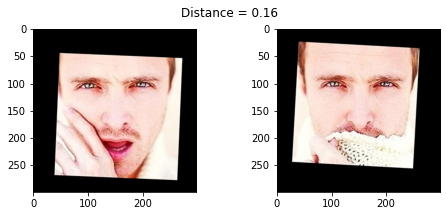

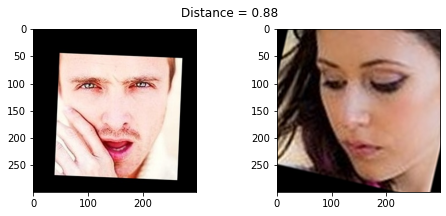

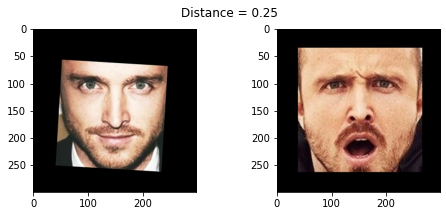

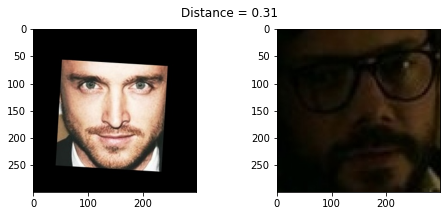

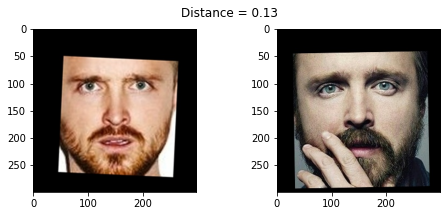

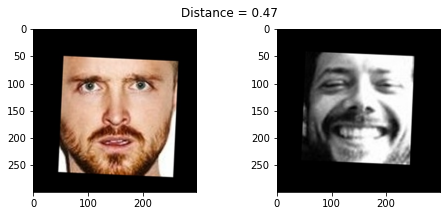

In [21]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
import numpy as np
#converting list of array into 2d array
embeddings = np.array(embeddings)
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0
#  train examples - 75% of the dataset
X_train = embeddings[train_idx]
# test examples - 25% of the dataset 
X_test = embeddings[test_idx]
imageNames = np.array([img.name for img in metadata])
n_classes = imageNames.shape[0] 



### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(imageNames)
# Numerical encoding of identities
y = encoder.transform(imageNames)
y.shape
y_train= y[train_idx]
y_test= y[test_idx]
y_train.shape

le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
#Encoded lables
print(le_name_mapping)

{'pins_Aaron Paul': 0, 'pins_Alvaro Morte': 1, 'pins_Amanda Crew': 2, 'pins_Amaury Nolasco': 3, 'pins_Anna Gunn': 4, 'pins_Benedict Cumberbatch': 5, 'pins_Betsy Brandt': 6, 'pins_Brenton Thwaites': 7, 'pins_Brit Marling': 8, 'pins_Bryan Cranston': 9, 'pins_Caity Lotz': 10, 'pins_Cameron Monaghan': 11, 'pins_Chance Perdomo': 12, 'pins_Chris Evans': 13, 'pins_Chris Pratt': 14, 'pins_Cobie Smulders': 15, 'pins_Danielle Panabaker': 16, 'pins_Dave Franco': 17, 'pins_Dominic Purcell': 18, 'pins_Dwayne Johnson': 19, 'pins_Emilia Clarke': 20, 'pins_Emily Bett Rickards': 21, 'pins_Emma Stone': 22, 'pins_Gwyneth Paltrow': 23, 'pins_Henry Cavil': 24, 'pins_Jason Momoa': 25, 'pins_Jeremy Renner': 26, 'pins_Jesse Eisenberg': 27, 'pins_Jim Parsons': 28, 'pins_Jon Bernthal': 29, 'pins_Josh Radnor': 30, 'pins_Kit Harington': 31, 'pins_Krysten Ritter': 32, 'pins_Kumail Nanjiani': 33, 'pins_Maisie Williams': 34, 'pins_Mark Ruffalo': 35, 'pins_Martin Starr': 36, 'pins_Melissa benoit': 37, 'pins_Mike Colt

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [25]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.fit_transform(X_test)
X_train_Scaled.shape
#### Add your code here ####

(9573, 2622)

### Reduce dimensions using PCA (5 marks)
- Reduce feature dimensions using Principal Component Analysis

Projecting the input data on the eigenfaces orthonormal basis


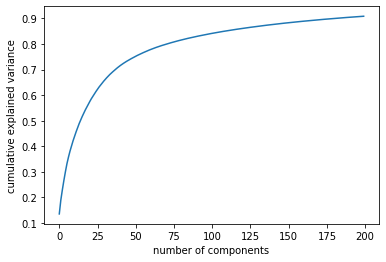

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
n_components = 200

pca = PCA(n_components = n_components, svd_solver ='randomized', 
		whiten = True).fit(X_train_Scaled) 

#eigenfaces = pca.components_.reshape((n_components, h, w)) 

print("Projecting the input data on the eigenfaces orthonormal basis") 

X_train_pca = pca.transform(X_train_Scaled)
X_test_pca = pca.transform(X_test_Scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Build a Classifier (5 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [38]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

svc = LinearSVC(verbose=2,)
svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca)
acc_svc = accuracy_score(y_test,y_pred)
print(' SVM accuracy = ',{acc_svc})
#### Add your code here ####

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 SVM accuracy =  {0.9473684210526315}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         7
           5       0.78      0.78      0.78         9
           6       0.80      1.00      0.89         8
           7       0.93      0.93      0.93        14
           8       0.88      1.00      0.93        14
           9       0.90      1.00      0.95         9
          10       0.93      1.00      0.96        13
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00         9
          13       0.91      1.00      0.95        10
          14       1.00      0.94      0.97        16
          15       1.00      1.00      1.00        14
          16       0.86      0.92      0.89

### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

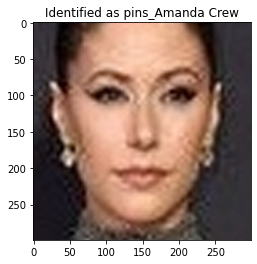

In [60]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 28

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_pred[example_idx]
example_identity = encoder.inverse_transform([example_prediction])[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

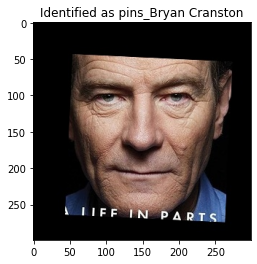

In [61]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_pred[example_idx]
example_identity = encoder.inverse_transform([example_prediction])[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

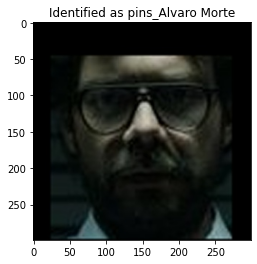

In [59]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_pred[example_idx]
example_identity = encoder.inverse_transform([example_prediction])[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');